In [1]:
from google.colab import drive
drive.mount('/content/drive/')
import os

os.chdir("/content/drive/My Drive/MIMIC")
os.listdir("/content/drive/My Drive/MIMIC")

Mounted at /content/drive/


['Multi-Filter-Residual-Convolutional-Neural-Network',
 'LAAT',
 'LAAT_Run.ipynb',
 'Process_Data',
 'MResCNN_RUN.ipynb',
 'BERT_FineTune',
 'Transformer_MCP_1.ipynb',
 'Bert-Chinese-Text-Classification-Pytorch',
 'Transformer_MCP_3.ipynb',
 'caml-mimic',
 'MResCNN_RUN_2.ipynb',
 'CALM_RUN.ipynb',
 'Transformer_MCP_4.ipynb',
 'Transformer_MCP_2.ipynb',
 'FineTune_Visualization.ipynb',
 'mca_bert',
 'Does_Bert_Magic.ipynb',
 'Find_MN.ipynb',
 'transformersum',
 'Transformer_MCP_6_ClinicalBert + Heir.ipynb',
 'Transformer_MCP_7_longformer.ipynb',
 'Transformer_MCP_8_ClinicalBert512 + Heir.ipynb',
 'Transformer_MCP_5_Bert-based-model + Heir.ipynb',
 'Transformer_MCP_10_ClinicalBert512 + Heir + DataAug.ipynb',
 'Transformer_MCP_9_Bert-based-model + Heir + DataAug.ipynb',
 'Data_Augmentation.ipynb',
 'Data_Augmentation_sub2.ipynb',
 'Data_Augmentation_sub3.ipynb',
 'Data_Augmentation_sub1.ipynb']

In [2]:
# import package
import pandas as pd
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

# 加载数据

In [3]:
train_data_punct = pd.read_csv('/content/drive/My Drive/MIMIC/caml-mimic/mimicdata/mimic3/train_50_punct.csv')
test_data_punct = pd.read_csv('/content/drive/My Drive/MIMIC/caml-mimic/mimicdata/mimic3/test_50_punct.csv')
dev_data_punct = pd.read_csv('/content/drive/My Drive/MIMIC/caml-mimic/mimicdata/mimic3/dev_50_punct.csv')

train_data = pd.read_csv('/content/drive/My Drive/MIMIC/caml-mimic/mimicdata/mimic3/train_50.csv')
test_data = pd.read_csv('/content/drive/My Drive/MIMIC/caml-mimic/mimicdata/mimic3/test_50.csv')
dev_data = pd.read_csv('/content/drive/My Drive/MIMIC/caml-mimic/mimicdata/mimic3/dev_50.csv')


In [4]:
def add_punct(text):
  result = ''
  text_list = text.split(' ')
  for index in range(len(text_list)-1):
    if text_list[index].istitle():
      result = result + ' . '+ text_list[index]
    else:
      result = result + ' ' + text_list[index]
  return result

In [5]:
def split_text(word_list,length):
  result = []
  # 我们先正向切句子
  chunk = ''
  for index in range(len(word_list)):
    chunk = chunk + ' ' + word_list[index]
    if index > 0 and index % length == 0: #我们已经记录了1200个单词
      result.append(chunk.strip())
      chunk = ''
  # 当最后 跑出循环时，chunk 还有内容，我们也加上
  if chunk != '' and len(chunk.split(' ')) >= 100:
    result.append(chunk.strip())
    chunk = ''
  return result

In [ ]:
train_data_punct.iloc[-1]

SUBJECT_ID                                                52139
HADM_ID                                                  137090
TEXT          Admission Date Discharge Date Date of Birth Se...
LABELS           511.9;287.5;486;272.4;995.92;401.9;38.93;038.9
length                                                     7567
Name: 8065, dtype: object

# Text Data Augmentation

In [ ]:
! pip install numpy requests nlpaug

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 410 kB 14.6 MB/s 


In [ ]:
import nlpaug.augmenter.char as nac
import nlpaug.augmenter.word as naw
import nlpaug.augmenter.sentence as nas
import nlpaug.flow as nafc

from nlpaug.util import Action

In [ ]:
text = 'The quick brown fox jumps over the lazy dog .'
print(text)

The quick brown fox jumps over the lazy dog .


In [ ]:
aug = naw.SynonymAug(aug_src='wordnet')

In [ ]:
text = 'predominantly fixed perfusion defect in the lad territory hospital1'
augmented_text = aug.augment(text)

print(text)
print("Original:")
print(text)
print("Augmented Text:")
print(augmented_text)

predominantly fixed perfusion defect in the lad territory hospital1
Original:
predominantly fixed perfusion defect in the lad territory hospital1
Augmented Text:
['predominantly fixed perfusion shortcoming in the lad territory hospital1']


# 统计数据长度分布

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


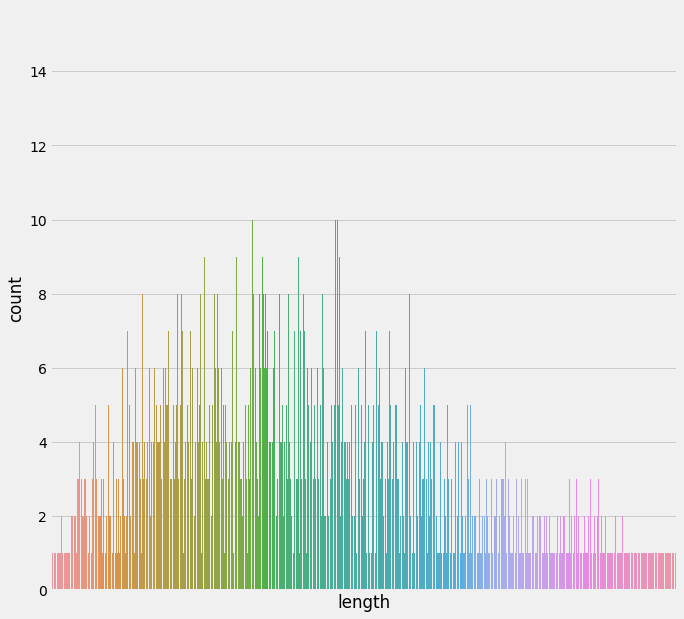

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


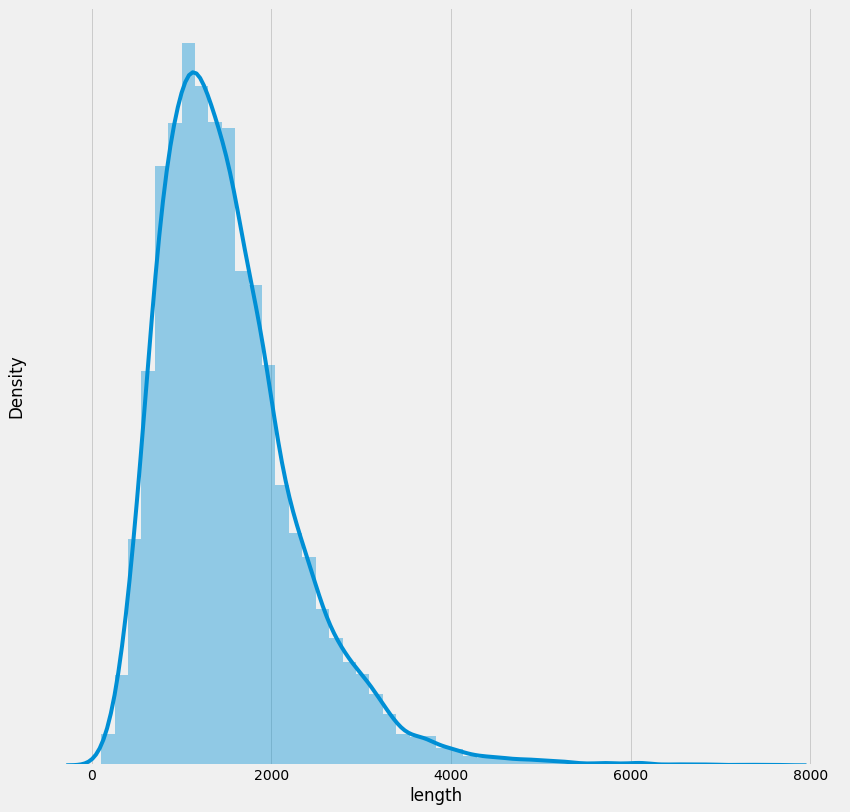

'\n# 绘制句子长度列的数量分布图\nplt.subplots(figsize=(10, 10))\nsns.countplot("length", data=train_data)\n \n# 主要关注count长度分布的纵坐标, 不需要绘制横坐标, 横坐标范围通过dist图进行查看\nplt.xticks([])\nplt.show()\n \n# 绘制dist长度分布图\nplt.subplots(figsize=(10, 10))\nsns.distplot(train_data["length"])\n \n# 主要关注dist长度分布横坐标, 不需要绘制纵坐标\nplt.yticks([])\n'

In [ ]:
# 设置显示风格
plt.style.use('fivethirtyeight')

plt.subplots(figsize=(10, 10))
# 绘制句子长度列的数量分布图
sns.countplot("length", data=train_data)
# 主要关注count长度分布的纵坐标, 不需要绘制横坐标, 横坐标范围通过dist图进行查看
plt.xticks([])
plt.show()

# 绘制dist长度分布图
# plt.subplots(figsize=(7, 7))
fig,ax = plt.subplots(figsize=(13, 13))
sns.distplot(train_data["length"])
 
# 主要关注dist长度分布横坐标, 不需要绘制纵坐标
plt.yticks([])
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


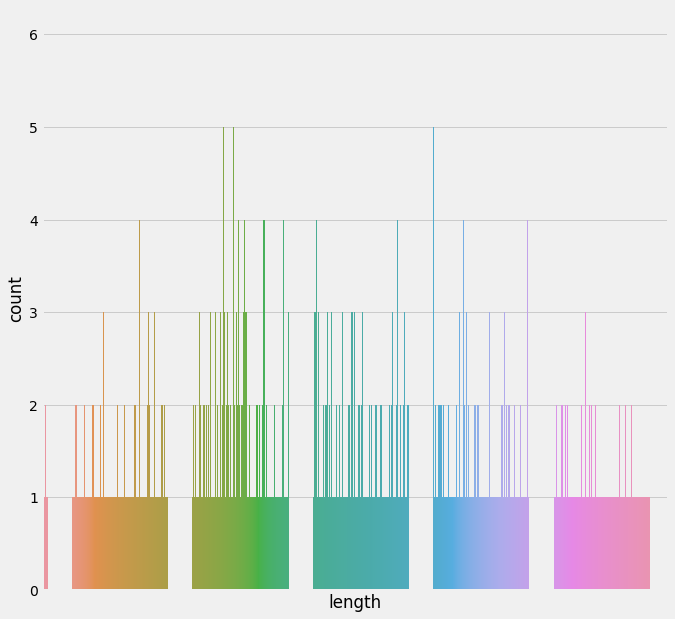

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


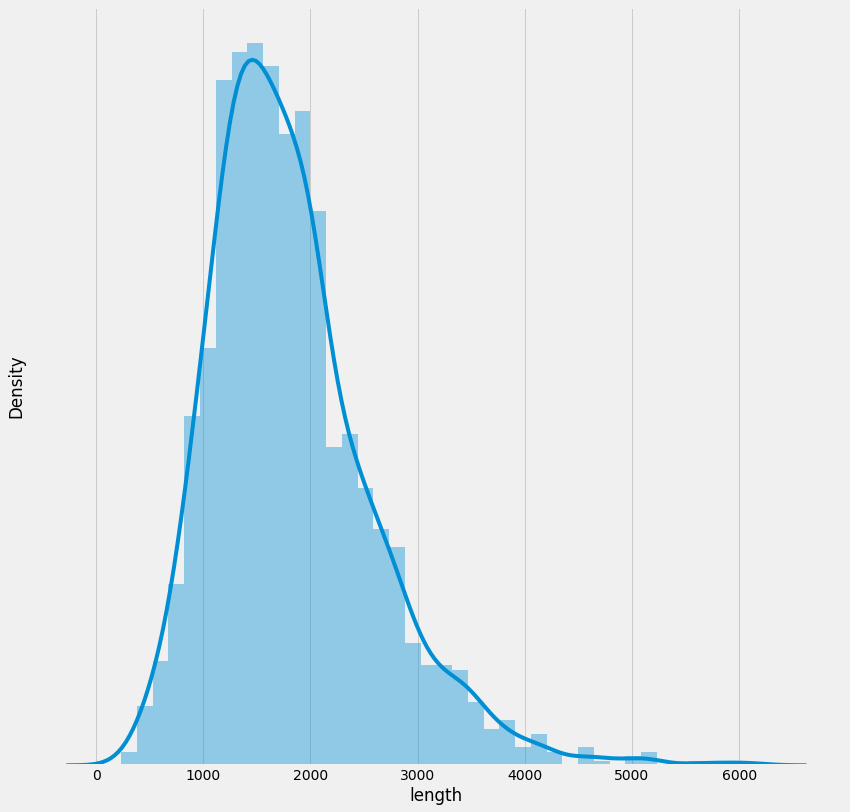

In [ ]:
# 设置显示风格
plt.style.use('fivethirtyeight')

plt.subplots(figsize=(10, 10))
# 绘制句子长度列的数量分布图
sns.countplot("length", data=test_data)
# 主要关注count长度分布的纵坐标, 不需要绘制横坐标, 横坐标范围通过dist图进行查看
plt.xticks([])
plt.show()

# 绘制dist长度分布图
# plt.subplots(figsize=(7, 7))
fig,ax = plt.subplots(figsize=(13, 13))
sns.distplot(test_data["length"])
 
# 主要关注dist长度分布横坐标, 不需要绘制纵坐标
plt.yticks([])
plt.show()

In [ ]:
dev_data[:5]

,SUBJECT_ID,HADM_ID,TEXT,LABELS,length
0,86006,111912,admission date discharge date date of birth se...,V58.61;401.9;96.71;427.31;414.01,230
1,85950,189769,admission date discharge date service neurosur...,403.90;585.9;250.00;V45.81;96.71,304
2,88025,180431,admission date discharge date date of birth se...,96.71;38.93;518.81,359
3,83776,152868,admission date discharge date date of birth se...,401.9;96.71;518.81;272.4,408
4,85055,169373,admission date discharge date date of birth se...,99.04;96.71,409


In [ ]:
dev_data[-5:]

# extractive text summarization by a pre-trained model

In [6]:
os.chdir("/content/drive/My Drive/MIMIC/transformersum")
#!tar -xzvf ./datasets/roberta-base.tar.gz

In [7]:
! pip install pytorch_lightning
! pip install transformers
! pip install torch_optimizer
! pip install wandb
! pip install rouge-score
! pip install packaging
! pip install datasets
! pip install gradio

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 706 kB 5.2 MB/s 
     |████████████████████████████████| 419 kB 43.1 MB/s 
     |████████████████████████████████| 5.9 MB 46.0 MB/s 
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.8.0
    Uninstalling tensorboard-2.8.0:
      Successfully uninstalled tensorboard-2.8.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow 2.8.2+zzzcolab20220719082949 requires tensorboard<2.9,>=2.8, but you have tensorboard 2.10.0 which is incompatible.
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 4.7 MB 5.0 MB/s 
     |████████████████████████████████| 120 kB 43.3 MB/s 
     |████████████████████████████████| 

In [8]:
import sys
sys.path.append("/content/drive/My Drive/MIMIC/transformersum/src")  # 注意，这里改变了地址了
from extractive import ExtractiveSummarizer 

In [9]:
os.chdir("/content/drive/My Drive/MIMIC/transformersum")

In [10]:
# model_long = ExtractiveSummarizer.load_from_checkpoint("./models/longformer/epoch=0-step=20000.ckpt")
model_roberta = ExtractiveSummarizer.load_from_checkpoint("./models/epoch=3.ckpt",strict=False)

/usr/local/lib/python3.7/dist-packages/pytorch_lightning/core/saving.py:264: UserWarning: Found keys that are in the model state dict but not in the checkpoint: ['word_embedding_model.embeddings.position_ids']
  f"Found keys that are in the model state dict but not in the checkpoint: {keys.missing_keys}"


In [23]:
def clean_text(text):
  # 最后我们把抽好的摘要做一下处理，去调句号，把所有的词改为小写
  result_clean = ''
  for word in text.split(' '):
    if word != '.' and word != '':
      result_clean = result_clean + ' ' +word.strip().lower()
  return result_clean.strip()

def get_summary(text,length): # 给定一个句子，我们试图把句子浓缩到length个词
  # 注意，我们的 text 必须是 有 '.' 以及 区分大小写的
  # 注意，由于我们吊桶 trasformersum 里的模型，必须保证我们使用的文本区分大小写，有句号
  # 首先，我们把text 分成200个词左右的一个个小区域
  text_chunks = []
  last_middle_sentence = ''
  middle_sentence = ''
  for sentence in text.split('.'):
    middle_sentence = middle_sentence + ' . ' + sentence
    if len(middle_sentence.split(' ')) >= 250:
      text_chunks.append(last_middle_sentence)
      last_middle_sentence = ''
      middle_sentence = ''
    else:
      last_middle_sentence = middle_sentence
  if middle_sentence != '' and len(middle_sentence.split(' ')) > 50:
    text_chunks.append(middle_sentence)
  # 其次，我们在一个个小区域里进行文本摘要生成,我们希望摘要的长度控制在 length 个词以内
  summary = ''
  for chunk in text_chunks:
    summary = summary + ' ' +model_roberta.predict(chunk,num_summary_sentences=6)
  summary = clean_text(summary)
  #print(len(summary.split(' ')))
  
  result = ''
  if len(summary.split(' ')) >= 1000 and len(summary.split(' ')) <= 1250:  # 如果抽出的 摘要长度在 1000 - 1400 之间，之间返回
    #print('1000 - 1250')
    #print(len(summary.split(' ')))
    result = clean_text(summary)
    #print(len(result.split(' ')))
  elif len(summary.split(' ')) < 800:
    #print('< 800')
    #print(len(summary.split(' ')),'num_chunk:',len(text_chunks))
    summary = ''
    for chunk in text_chunks:
      summary = summary + ' ' +model_roberta.predict(chunk,num_summary_sentences=10)
    result = clean_text(summary)
    #print(len(result.split(' ')))
  elif len(summary.split(' ')) < 1000 and len(summary.split(' ')) > 800:
    #print('< 1000')
    #print(len(summary.split(' ')),'num_chunk:',len(text_chunks))
    summary = ''
    for chunk in text_chunks:
      summary = summary + ' ' +model_roberta.predict(chunk,num_summary_sentences=9)
    result = clean_text(summary)
    #print(len(result.split(' ')))
  '''
  elif len(summary.split(' ')) > 1250 and len(summary.split(' ')) < 1400:
    #print('>1250, < 1400')
    #print(len(summary.split(' ')),'num_chunk:',len(text_chunks))
    summary = ''
    for chunk in text_chunks:
      summary = summary + ' ' +model_roberta.predict(chunk,num_summary_sentences=5)
    result = clean_text(summary)
    #print(len(result.split(' ')))
  
  elif len(summary.split(' ')) > 1400:
    #print('>1400')
    #print(len(summary.split(' ')),'num_chunk:',len(text_chunks))
    summary = ''
    for chunk in text_chunks:
      summary = summary + ' ' +model_roberta.predict(chunk,num_summary_sentences=3)
    result = clean_text(summary)
    #print(len(result.split(' ')))
  '''
  return result

In [24]:
test_data[750:755]

,SUBJECT_ID,HADM_ID,TEXT,LABELS,length
750,89402,136507,admission date discharge date date of birth se...,401.9;39.61;285.9,1597
751,95893,126615,admission date discharge date date of birth se...,305.1;401.9;285.9;272.0,1597
752,99166,184860,admission date discharge date date of birth se...,88.72;401.9;530.81,1598
753,94072,126297,admission date discharge date date of birth se...,401.9,1600
754,91665,128236,admission date discharge date service surgery ...,410.71;99.04;V58.61;496;401.9;428.0;276.2;427....,1601


In [28]:
test_data_punct[950:955]

,SUBJECT_ID,HADM_ID,TEXT,LABELS,length
950,92339,120575,Admission Date Discharge Date Date of Birth Se...,530.81;287.5;427.31;496,1784
951,89816,120148,Admission Date Discharge Date Date of Birth Se...,96.71;272.4;285.1;244.9;401.9;39.61,1786
952,96701,115756,Admission Date Discharge Date Date of Birth Se...,511.9;33.24;428.0;V45.81;250.00,1787
953,99273,168818,Admission Date Discharge Date Date of Birth Se...,96.71;287.5;244.9;401.9;311,1789
954,99458,121483,Admission Date Discharge Date Date of Birth Se...,428.0;584.9;V15.82;401.9;250.00;496,1790


In [29]:
summ = get_summary(add_punct(test_data_punct.iloc[954][2]),length=1200)
summ

'surgical or procedure ercp with sphicterotomy and sphincteroplasty coumadin pacemaker dm2 presenting with abdominal pain he had episodes of abdominal discomfort over the past couple of months each lasting for hours associated with yawning and without any clear association with meals the patient developed severe abdominal pain during dinner last night at around p m when he tried to get up he became dizzy and had to lie down he had one episode of non bloody emesis and presented to hospital for further evaluation the patient reports abdominal pain as his primary symptoms but hospital records dyspnea was his chief complaint there hospital the patient was found to be hypotensive to the 70s dbili tbili ast alt amylase lipase troponin t neg wbc hct plt inr digoxin u a neg abg on 2l nc ct chest abdomen with iv contrast showed non specific gallbladder wall thickening mild to moderate fluid and stranding around the pancreas no pe cr alt ast ap lipase lactate abdominal ultrasound showed gallblad

In [30]:
len(summ.split(' '))

1166

# Train Model

In [ ]:
os.chdir("/content/drive/My Drive/MIMIC/transformersum")

In [ ]:
! python ./src/main.py \
  --model_name_or_path allenai/led-base-16384 \
  --model_type bert \
  --data_path ./datasets/roberta-base/ \
  --max_epochs 3 \
  --accumulate_grad_batches 2 \
  --warmup_steps 2300 \
  --max_steps 20000 \
  --gradient_clip_val 1.0 \
  --optimizer_type adamw \
  --use_scheduler linear \
  --do_train --do_test \
  --batch_size 4 \
  --data_type pt \
  --dataloader_type iterable \
  --no_use_token_type_ids

Streaming output truncated to the last 5000 lines.
/usr/local/lib/python3.7/dist-packages/transformers/data/metrics/__init__.py:36: FutureWarning: This metric will be removed from the library soon, metrics should be handled with the 🤗 Datasets library. You can have a look at this example script for pointers: https://github.com/huggingface/transformers/blob/main/examples/pytorch/text-classification/run_glue.py
  warnings.warn(DEPRECATION_WARNING, FutureWarning)
/usr/local/lib/python3.7/dist-packages/transformers/data/metrics/__init__.py:42: FutureWarning: This metric will be removed from the library soon, metrics should be handled with the 🤗 Datasets library. You can have a look at this example script for pointers: https://github.com/huggingface/transformers/blob/main/examples/pytorch/text-classification/run_glue.py
  warnings.warn(DEPRECATION_WARNING, FutureWarning)
/usr/local/lib/python3.7/dist-packages/transformers/data/metrics/__init__.py:36: FutureWarning: This metric will be remov

# Data Augamentation

In [ ]:
############# 针对训练数据进行增强  ###########################
DAsplit_train_data = [[],    # SUBJECT_ID
                 [],    # HADM_ID
                 [],    # TEXT
                 [],    # LABELS
                 []]    # length

for index in range(7500,7800) :
  # 拿到一份样本的所有训练数据
  raw_info = train_data.iloc[index]
  subject_id = raw_info[0]
  hadm_id = raw_info[1]
  text = raw_info[2]
  labels= str(raw_info[3])
  length = raw_info[4]
  
  if len(text.split(' ')) <= 1200: # 如果文本本身足够短，在1200个词以内，我们就不进行 文本增强 
    DAsplit_train_data[0].append(subject_id)
    DAsplit_train_data[1].append(hadm_id)
    DAsplit_train_data[2].append(text)
    DAsplit_train_data[3].append(labels)
    DAsplit_train_data[4].append(len(text.split(' ')))
  if len(text.split(' ')) > 1800 : # 如果文本长度在1800 以上，我们进行 摘要抽取
    text_punct = train_data_punct.iloc[index][2]
    summary = get_summary(add_punct(text_punct),length=1200)
    DAsplit_train_data[0].append(subject_id)
    DAsplit_train_data[1].append(hadm_id)
    DAsplit_train_data[2].append(summary)
    DAsplit_train_data[3].append(labels)
    DAsplit_train_data[4].append(len(summary.split(' ')))
  
  if len(text.split(' ')) > 1600: # 如果文本的长度在2000 以上，我们进行 split, 把数据 split 开    
    text_split = split_text(text.split(' '),length=1200)
    for chunk in text_split:
      DAsplit_train_data[0].append(subject_id)
      DAsplit_train_data[1].append(hadm_id)
      DAsplit_train_data[2].append(chunk)
      DAsplit_train_data[3].append(labels)
      DAsplit_train_data[4].append(len(chunk.split(' ')))
  
  if index % 1 == 0:
    print('finish:',index)

# transform to dataframe_data
DAsplit_train_data_dict =  {'SUBJECT_ID':DAsplit_train_data[0],
                            'HADM_ID':DAsplit_train_data[1],
                            'TEXT':DAsplit_train_data[2],
                            'LABELS':DAsplit_train_data[3],
                            'length':DAsplit_train_data[4]}
DAsplit_train_data_pd = pd.DataFrame.from_dict(DAsplit_train_data_dict)
DAsplit_train_data_pd.to_csv('/content/drive/My Drive/MIMIC/caml-mimic/mimicdata/mimic3/train_50_pro_7500to7800.csv')

In [34]:
############# 针对 测试数据进行增强  ###########################
DAsplit_test_data = [[],    # SUBJECT_ID
                 [],    # HADM_ID
                 [],    # TEXT
                 [],    # LABELS
                 []]    # length

for index in range(0,1000):
  # 拿到一份样本的所有训练数据
  raw_info = test_data.iloc[index]
  subject_id = raw_info[0]
  hadm_id = raw_info[1]
  text = raw_info[2]
  labels= str(raw_info[3])
  length = raw_info[4]
  
  if len(text.split(' ')) <= 1600: # 如果文本本身足够短，在1200个词以内，我们就不进行 文本增强 
    DAsplit_test_data[0].append(subject_id)
    DAsplit_test_data[1].append(hadm_id)
    DAsplit_test_data[2].append(text)
    DAsplit_test_data[3].append(labels)
    DAsplit_test_data[4].append(len(text.split(' ')))
  if len(text.split(' ')) > 1600 : # 如果文本长度在1600 以上，我们进行 摘要抽取
    text_punct = test_data_punct.iloc[index][2]
    summary = get_summary(add_punct(text_punct),length=1200)
    DAsplit_test_data[0].append(subject_id)
    DAsplit_test_data[1].append(hadm_id)
    DAsplit_test_data[2].append(summary)
    DAsplit_test_data[3].append(labels)
    DAsplit_test_data[4].append(len(summary.split(' ')))
  print('index:',index,'\tlength:',len(DAsplit_test_data[0]),'\tlast text length:',DAsplit_test_data[4][-1])

# transform to dataframe_data
DAsplit_test_data_dict =  {'SUBJECT_ID':DAsplit_test_data[0],
                            'HADM_ID':DAsplit_test_data[1],
                            'TEXT':DAsplit_test_data[2],
                            'LABELS':DAsplit_test_data[3],
                            'length':DAsplit_test_data[4]}
DAsplit_test_data_pd = pd.DataFrame.from_dict(DAsplit_test_data_dict)
DAsplit_test_data_pd
# DAsplit_test_data_pd.to_csv('/content/drive/My Drive/MIMIC/caml-mimic/mimicdata/mimic3/test_50_pro_1400toend.csv')    

index: 0 	length: 1 	last text length: 235
index: 1 	length: 2 	last text length: 369
index: 2 	length: 3 	last text length: 370
index: 3 	length: 4 	last text length: 392
index: 4 	length: 5 	last text length: 413
index: 5 	length: 6 	last text length: 444
index: 6 	length: 7 	last text length: 447
index: 7 	length: 8 	last text length: 449
index: 8 	length: 9 	last text length: 449
index: 9 	length: 10 	last text length: 460
index: 10 	length: 11 	last text length: 485
index: 11 	length: 12 	last text length: 492
index: 12 	length: 13 	last text length: 502
index: 13 	length: 14 	last text length: 505
index: 14 	length: 15 	last text length: 506
index: 15 	length: 16 	last text length: 511
index: 16 	length: 17 	last text length: 536
index: 17 	length: 18 	last text length: 538
index: 18 	length: 19 	last text length: 564
index: 19 	length: 20 	last text length: 566
index: 20 	length: 21 	last text length: 567
index: 21 	length: 22 	last text length: 572
index: 22 	length: 23 	last t

,SUBJECT_ID,HADM_ID,TEXT,LABELS,length
0,92003,193800,admission date discharge date date of birth se...,96.04;96.71;518.81,235
1,95088,158927,admission date discharge date date of birth se...,401.9;96.71;V45.81,369
2,96937,129034,admission date discharge date date of birth se...,995.92;250.00;96.71;427.31;038.9,370
3,92458,124309,admission date discharge date date of birth se...,96.04;96.71;38.93,392
4,98802,101071,admission date discharge date date of birth se...,401.9;96.71;414.01,413
...,...,...,...,...,...
995,99923,164914,hypotension in setting of ativan administratio...,585.9;45.13;276.1;584.9;V15.82,1103
996,91763,192081,right internal jugular central venous catheter...,401.9;584.9;38.91;995.92,1049
997,94200,119344,complaint transferred for management of sdh su...,401.9;599.0;511.9,1081
998,94537,199781,chief complaint acute psychosis dehydration kn...,96.04;250.00;96.71;584.9,1134


In [35]:
DAsplit_test_data_pd.to_csv('/content/drive/My Drive/MIMIC/caml-mimic/mimicdata/mimic3/test_50_pro_0to1000.csv')  